# Logistic Regression - Classification

In [36]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFECV

In [2]:
data_for_model = pickle.load(open("C:/Users/vatsal/Desktop/machine learning/model builidng/data/abc_classification_modelling.p", "rb"))
data_for_model

,customer_id,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
0,74,1,3.38,F,0.59,1586.89,195,26,5,61.034231
1,524,1,4.76,F,0.52,2397.26,258,27,5,88.787407
2,607,1,4.45,F,0.49,1279.91,183,22,5,58.177727
3,343,0,0.91,M,0.54,967.14,102,17,5,56.890588
4,322,1,3.02,F,0.63,1566.35,182,30,5,52.211667
...,...,...,...,...,...,...,...,...,...,...
855,372,1,4.38,F,0.50,1381.28,103,12,5,115.106667
856,104,1,2.36,F,0.63,1464.62,127,22,5,66.573636
857,393,1,1.87,M,0.59,2213.97,191,38,5,58.262368
858,373,0,0.21,M,0.47,1446.00,133,22,5,65.727273


In [3]:
data_for_model.drop("customer_id", axis =1, inplace=True)
data_for_model

,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
0,1,3.38,F,0.59,1586.89,195,26,5,61.034231
1,1,4.76,F,0.52,2397.26,258,27,5,88.787407
2,1,4.45,F,0.49,1279.91,183,22,5,58.177727
3,0,0.91,M,0.54,967.14,102,17,5,56.890588
4,1,3.02,F,0.63,1566.35,182,30,5,52.211667
...,...,...,...,...,...,...,...,...,...
855,1,4.38,F,0.50,1381.28,103,12,5,115.106667
856,1,2.36,F,0.63,1464.62,127,22,5,66.573636
857,1,1.87,M,0.59,2213.97,191,38,5,58.262368
858,0,0.21,M,0.47,1446.00,133,22,5,65.727273


In [4]:
#shuffle data
data_for_model = shuffle(data_for_model, random_state = 42)

In [5]:
#Class Balance

data_for_model["signup_flag"].value_counts(normalize=True)

0    0.689535
1    0.310465
Name: signup_flag, dtype: float64

In [6]:
#dealing with missing value
data_for_model.isna().sum

<bound method DataFrame.sum of      signup_flag  distance_from_store  gender  credit_score  total_sales  \
714        False                False   False         False        False   
605        False                False   False         False        False   
120        False                False   False         False        False   
208        False                False   False         False        False   
380        False                False   False         False        False   
..           ...                  ...     ...           ...          ...   
71         False                False   False         False        False   
106        False                False   False         False        False   
270        False                False   False         False        False   
435        False                False   False         False        False   
102        False                False   False         False        False   

     total_items  transaction_count  product_area_count 

In [7]:
data_for_model.dropna(how="any", inplace=True)
data_for_model

C:\Users\vatsal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
714,0,1.64,M,0.58,27.81,6,3,3,9.270000
605,0,0.88,M,0.63,26.62,9,3,2,8.873333
120,0,0.56,M,0.62,886.78,154,18,4,49.265556
208,0,0.11,M,0.58,1256.19,168,34,5,36.946765
380,0,1.32,M,0.36,739.67,110,21,3,35.222381
...,...,...,...,...,...,...,...,...,...
71,0,0.07,M,0.57,746.15,133,24,5,31.089583
106,0,1.96,F,0.60,881.49,166,24,4,36.728750
270,0,1.59,M,0.50,319.37,85,17,5,18.786471
435,0,0.71,F,0.54,273.94,74,20,4,13.697000


In [8]:
#dealing with Outliers
outlier_investigation = data_for_model.describe()
outlier_investigation

,signup_flag,distance_from_store,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
count,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000
mean,0.304604,2.614545,0.597521,968.166411,143.877214,22.214876,4.177096,38.034161
std,0.460512,14.397590,0.102264,1073.647531,125.342694,11.721699,0.920887,24.243691
min,0.000000,0.000000,0.260000,2.090000,1.000000,1.000000,1.000000,2.090000
25%,0.000000,0.730000,0.530000,383.940000,77.000000,16.000000,4.000000,21.734700
50%,0.000000,1.640000,0.590000,691.640000,123.000000,23.000000,4.000000,31.069333
75%,1.000000,2.920000,0.670000,1121.530000,170.500000,28.000000,5.000000,46.429973
max,1.000000,400.970000,0.880000,7372.060000,910.000000,75.000000,5.000000,141.054091


In [9]:
outlier_columns = ["distance_from_store", "total_sales", "total_items"]
#boxplot approach

for column in outlier_columns:
    lower_quartile = data_for_model[column].quantile(0.25)
    upper_quartile = data_for_model[column].quantile(0.75)
    iqr = upper_quartile - lower_quartile
    iqr_extended = iqr * 2
    min_border = lower_quartile - iqr_extended
    max_border = upper_quartile + iqr_extended
    
    outliers = data_for_model[(data_for_model[column] < min_border) | (data_for_model[column] > max_border)].index
    print(f"{len(outliers)} outliers detected in column {column}")
    
    data_for_model.drop(outliers, inplace=True)

8 outliers detected in column distance_from_store
54 outliers detected in column total_sales
3 outliers detected in column total_items


C:\Users\vatsal\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
#split input variables & output variables

X = data_for_model.drop(["signup_flag"], axis = 1)
y = data_for_model["signup_flag"]
X, y

(     distance_from_store gender  credit_score  total_sales  total_items  \
 714                 1.64      M          0.58        27.81            6   
 605                 0.88      M          0.63        26.62            9   
 120                 0.56      M          0.62       886.78          154   
 208                 0.11      M          0.58      1256.19          168   
 380                 1.32      M          0.36       739.67          110   
 ..                   ...    ...           ...          ...          ...   
 71                  0.07      M          0.57       746.15          133   
 106                 1.96      F          0.60       881.49          166   
 270                 1.59      M          0.50       319.37           85   
 435                 0.71      F          0.54       273.94           74   
 102                 2.60      F          0.48       523.41           89   
 
      transaction_count  product_area_count  average_basket_value  
 714              

In [11]:
#split out Training & test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify= y)

In [12]:
#deal with categorical variables

categorical_vars = ["gender"]

one_hot_encoder = OneHotEncoder(sparse=False, drop="first")

X_train_encoded = one_hot_encoder.fit_transform(X_train[categorical_vars])
X_test_encoded = one_hot_encoder.transform(X_test[categorical_vars])

encoder_feature_names = one_hot_encoder.get_feature_names(categorical_vars)

X_train_encoded = pd.DataFrame(X_train_encoded, columns = encoder_feature_names)
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis = 1)
X_train.drop(categorical_vars, axis =1, inplace = True)

X_test_encoded = pd.DataFrame(X_test_encoded, columns = encoder_feature_names)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis = 1)
X_test.drop(categorical_vars, axis =1, inplace = True)
X_train

C:\Users\vatsal\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,distance_from_store,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value,gender_M
0,0.07,0.57,746.15,133,24,5,31.089583,1.0
1,0.20,0.57,585.46,128,32,4,18.295625,1.0
2,3.07,0.53,1151.24,226,35,5,32.892571,0.0
3,2.86,0.77,14.03,8,2,2,7.015000,0.0
4,0.52,0.52,656.48,121,16,3,41.030000,1.0
...,...,...,...,...,...,...,...,...
620,0.39,0.72,564.47,146,25,4,22.578800,1.0
621,1.62,0.72,793.91,171,20,3,39.695500,1.0
622,2.60,0.65,847.01,123,22,5,38.500455,0.0
623,0.36,0.45,924.07,189,20,3,46.203500,1.0


Optimal number of features: 7


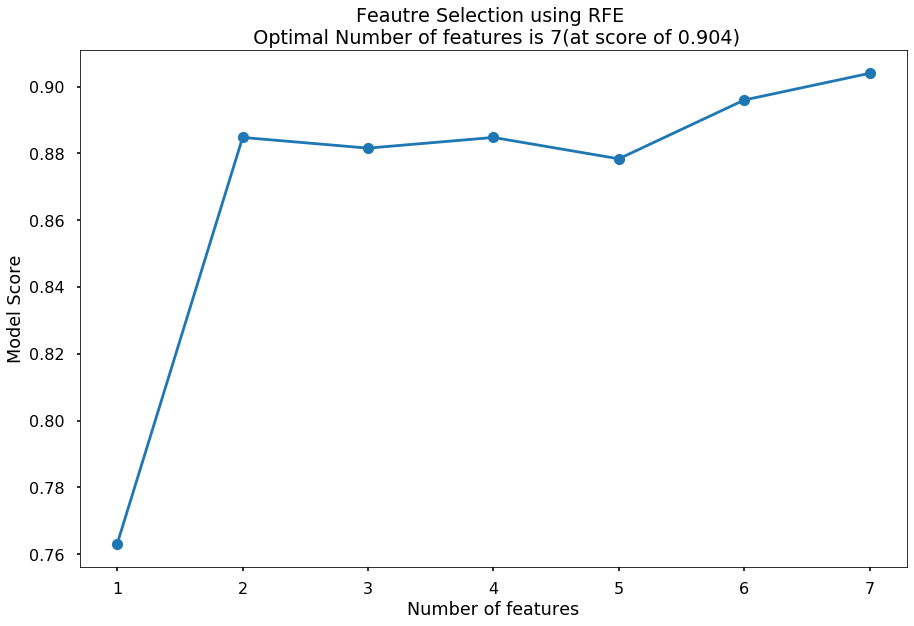

In [44]:
#feature selection

clf= LogisticRegression(random_state = 42, max_iter = 1000)
feature_selector = RFECV(clf)

fit = feature_selector.fit(X_train,y_train)

optimal_feature_count = feature_selector.n_features_
print(f"Optimal number of features: {optimal_feature_count}")

X_train = X_train.loc[:, feature_selector.get_support()]
X_test = X_test.loc[:, feature_selector.get_support()]

plt.plot(range(1, len(fit.cv_results_['mean_test_score'])+1), fit.cv_results_['mean_test_score'], marker="o")
plt.ylabel("Model Score")
plt.xlabel("Number of features")
plt.title(f"Feautre Selection using RFE \n Optimal Number of features is {optimal_feature_count}(at score of {round(max(fit.cv_results_['mean_test_score']), 4)})")
plt.tight_layout()
plt.show()

In [16]:
#Model Training
clf= LogisticRegression(random_state = 42, max_iter = 1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [19]:
#Model assessment
y_pred_class = clf.predict(X_test)

y_pred_prob = clf.predict_proba(X_test)[:,1]

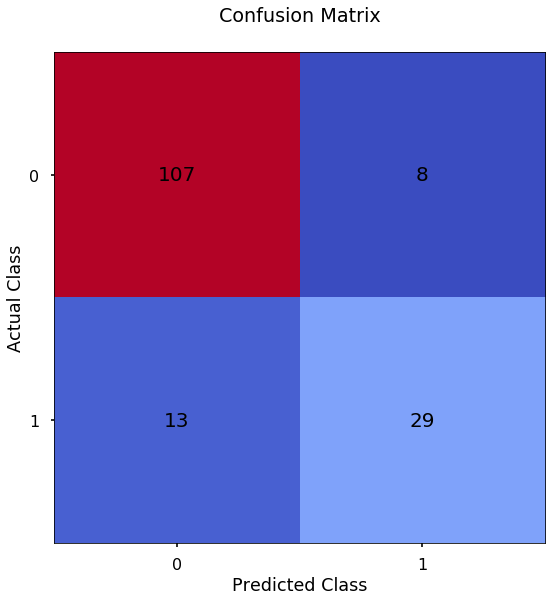

In [20]:
# Confusion maxtrix

conf_matrix = confusion_matrix(y_test, y_pred_class)

plt.style.use("seaborn-poster")
plt.matshow(conf_matrix, cmap = "coolwarm")
plt.gca().xaxis.tick_bottom()
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
for (i,j), corr_value in np.ndenumerate(conf_matrix):
    plt.text(j,i,corr_value,ha="center", va="center", fontsize=20)
plt.show()

In [21]:
#Accuracy(number of correct classification out of all attempted classfications)

accuracy_score(y_test, y_pred_class)



0.8662420382165605

In [22]:
#Precision(of all observations that were predicted as positive, how many are actually positive)

precision_score(y_test, y_pred_class)

0.7837837837837838

In [23]:
#Recall(of all positive observations how many did we predict as positive)
recall_score(y_test, y_pred_class)

0.6904761904761905

In [24]:
# F1-Score(the harmonic mean of precision and recall)
f1_score(y_test, y_pred_class)

0.7341772151898734

In [27]:
# Finding the optimal threshold
thresholds = np.arange(0,1,0.01)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [39]:
precision_scores = []
recall_scores = []
f1_scores= []

for threshold in thresholds:
    pred_class = (y_pred_prob >= threshold) * 1
    
    precision = precision_score(y_test, pred_class, zero_division= 0)
    precision_scores.append(precision)
    
    recall = recall_score(y_test, pred_class)
    recall_scores.append(recall)
    
    f1= f1_score(y_test, pred_class)
    f1_scores.append(f1)

max_f1 = max(f1_scores)
max_f1_idx = f1_scores.index(max_f1)
max_f1

0.7804878048780488

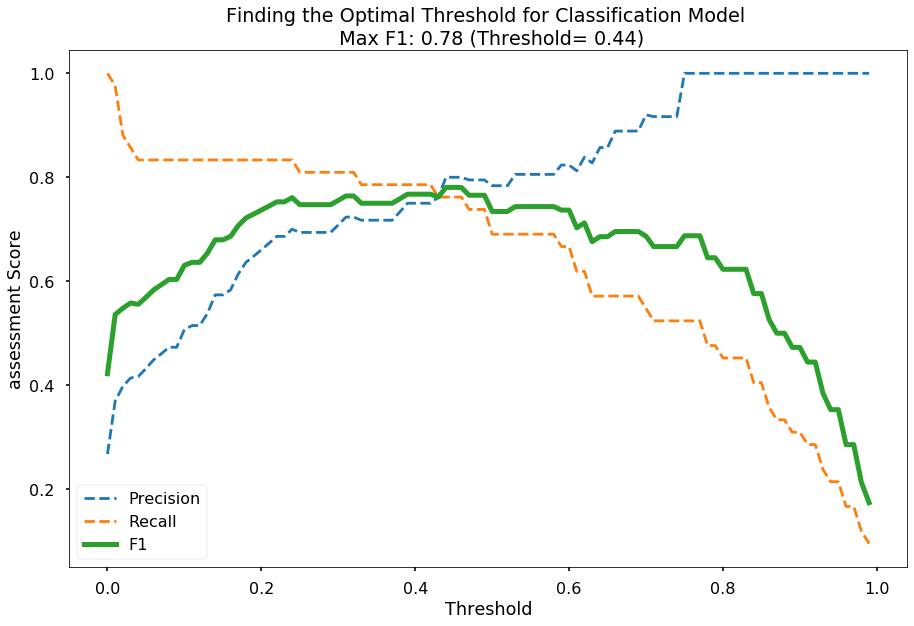

In [41]:
plt.style.use("seaborn-poster")
plt.plot(thresholds, precision_scores, label = "Precision", linestyle = "--")
plt.plot(thresholds, recall_scores, label = "Recall", linestyle = "--")
plt.plot(thresholds, f1_scores, label = "F1", linewidth = 5)
plt.title(f"Finding the Optimal Threshold for Classification Model \n Max F1: {round(max_f1,2)} (Threshold= {round(thresholds[max_f1_idx],2)})")
plt.xlabel("Threshold")
plt.ylabel("assessment Score")
plt.legend(loc = "lower left")
plt.tight_layout()
plt.show()

In [43]:
optimal_threshold = 0.44
y_pred_class_opt_thresh = (y_pred_prob >= optimal_threshold) * 1
y_pred_class_opt_thresh

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0])